In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [56]:
train_df = pd.read_csv('/Users/saranyak/Desktop/GT/Fall2023/ComputationalDataAnalytics/Project/GenreClassification/Preprocessing/Output/NotEncoded_Genres_ArtistsEncoded/p%ofgenre/Train.csv')
test_df = pd.read_csv('/Users/saranyak/Desktop/GT/Fall2023/ComputationalDataAnalytics/Project/GenreClassification/Preprocessing/Output/NotEncoded_Genres_ArtistsEncoded/p%ofgenre/Test.csv')

In [57]:
X_train = train_df.drop(columns=['genres'])
y_train = train_df['genres']

In [58]:
X_test = test_df.drop(columns=['genres'])
y_test = test_df['genres']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [60]:
X_train

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,Artists_encoded
18629,0.152514,0.684118,292790.588235,0.582059,2.512353e-06,0.324165,-11.494706,0.085300,119.951000,0.635824,46.647059,5,0,34,4093
7256,0.110815,0.639500,270396.625000,0.734875,1.022312e-04,0.069687,-10.153500,0.035987,125.001875,0.673000,40.750000,4,1,16,795
6407,0.511591,0.639217,208689.260870,0.534348,5.304348e-07,0.187648,-8.348304,0.034348,129.692391,0.496304,39.695652,4,1,46,2240
18913,0.088451,0.663519,206259.092593,0.716407,1.901248e-04,0.192709,-5.128296,0.101763,115.466852,0.624815,64.648148,0,1,54,3886
11081,0.395750,0.472500,261716.500000,0.805250,2.145575e-01,0.158300,-7.381750,0.041600,111.086000,0.694000,36.250000,7,1,8,777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.855000,0.631000,269133.000000,0.324000,0.000000e+00,0.074200,-8.830000,0.042500,119.064000,0.447000,57.000000,4,1,2,4718
11964,0.239708,0.754515,231926.886598,0.738402,1.943326e-04,0.170296,-4.753938,0.097689,127.830938,0.668474,60.010309,7,0,97,6250
5390,0.699550,0.318850,160508.800000,0.330200,5.105340e-04,0.157735,-12.201400,0.035920,111.960400,0.397020,21.850000,7,1,40,3776
860,0.128000,0.819000,307440.000000,0.428000,1.510000e-03,0.211000,-9.883000,0.317000,87.900000,0.454000,55.000000,5,0,1,6487


In [61]:
X_valid

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,Artists_encoded
15671,0.011463,0.560000,252424.000000,0.884000,0.113356,0.349813,-4.203875,0.081638,119.750250,0.463250,50.375000,2,1,16,1263
8048,0.665833,0.527667,149444.500000,0.270500,0.201406,0.084183,-16.250167,0.037000,127.041833,0.485167,10.500000,9,1,12,7431
7153,0.318000,0.531000,209716.500000,0.615500,0.000000,0.172250,-6.244500,0.126450,114.480500,0.474500,63.500000,2,1,2,7602
1087,0.858064,0.408936,157726.961538,0.312526,0.001029,0.198821,-11.307974,0.032046,93.516936,0.423154,28.756410,3,1,156,8494
17360,0.075053,0.668125,246726.750000,0.550625,0.000902,0.149375,-14.332375,0.037012,122.263625,0.821625,32.500000,9,1,16,6274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10156,0.837560,0.244669,294471.941292,0.198553,0.731984,0.168493,-19.996155,0.045730,103.934483,0.141831,28.512720,0,1,511,5054
252,0.334891,0.503174,200183.434783,0.499609,0.117946,0.160704,-7.466087,0.083709,103.786435,0.286826,72.000000,5,1,23,4755
6876,0.000148,0.665000,249600.000000,0.913000,0.412000,0.384000,-2.299000,0.046100,100.005000,0.439000,51.000000,1,1,2,2316
511,0.005470,0.407000,155199.666667,0.799000,0.000000,0.159133,-6.340333,0.068633,166.578000,0.590667,51.666667,7,1,6,2406


In [62]:
artists_encoded_train = X_train[['Artists_encoded','key','mode']]
artists_encoded_valid = X_valid[['Artists_encoded','key','mode']]
artists_encoded_test = X_test[['Artists_encoded','key','mode']]
X_train = X_train.drop(columns=['Artists_encoded','key','mode'])
X_valid = X_valid.drop(columns=['Artists_encoded','key','mode'])
X_test = X_test.drop(columns=['Artists_encoded','key','mode'])

In [63]:
X_train

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,count
18629,0.152514,0.684118,292790.588235,0.582059,2.512353e-06,0.324165,-11.494706,0.085300,119.951000,0.635824,46.647059,34
7256,0.110815,0.639500,270396.625000,0.734875,1.022312e-04,0.069687,-10.153500,0.035987,125.001875,0.673000,40.750000,16
6407,0.511591,0.639217,208689.260870,0.534348,5.304348e-07,0.187648,-8.348304,0.034348,129.692391,0.496304,39.695652,46
18913,0.088451,0.663519,206259.092593,0.716407,1.901248e-04,0.192709,-5.128296,0.101763,115.466852,0.624815,64.648148,54
11081,0.395750,0.472500,261716.500000,0.805250,2.145575e-01,0.158300,-7.381750,0.041600,111.086000,0.694000,36.250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.855000,0.631000,269133.000000,0.324000,0.000000e+00,0.074200,-8.830000,0.042500,119.064000,0.447000,57.000000,2
11964,0.239708,0.754515,231926.886598,0.738402,1.943326e-04,0.170296,-4.753938,0.097689,127.830938,0.668474,60.010309,97
5390,0.699550,0.318850,160508.800000,0.330200,5.105340e-04,0.157735,-12.201400,0.035920,111.960400,0.397020,21.850000,40
860,0.128000,0.819000,307440.000000,0.428000,1.510000e-03,0.211000,-9.883000,0.317000,87.900000,0.454000,55.000000,1


In [64]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [65]:
X_train_scaled.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
count               0
dtype: int64

In [67]:
artists_encoded_train = artists_encoded_train.reset_index(drop=True)
artists_encoded_valid = artists_encoded_valid.reset_index(drop=True)
artists_encoded_test = artists_encoded_test.reset_index(drop=True)

X_train_scaled[['Artists_encoded','key','mode']] = artists_encoded_train
X_valid_scaled[['Artists_encoded','key','mode']] = artists_encoded_valid
X_test_scaled[['Artists_encoded','key','mode']] = artists_encoded_test

print("Training set shape:", X_train_scaled.shape, y_train.shape)
print("Validation set shape:", X_valid_scaled.shape, y_valid.shape)
print("Test set shape:", X_test_scaled.shape, y_test.shape)

Training set shape: (15310, 15) (15310,)
Validation set shape: (5104, 15) (5104,)
Test set shape: (5104, 15) (5104,)


In [30]:
X_train_scaled

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,count,Artists_encoded,key,mode
0,-0.577992,0.686295,0.683235,-0.094437,-0.463518,1.355703,-0.612333,-0.006016,0.019832,0.468020,0.133736,-0.018584,4093,5,0
1,-0.731851,0.362544,0.359663,0.688777,-0.462981,-1.227454,-0.280344,-0.642157,0.297761,0.669181,-0.270294,-0.263442,795,4,1
2,0.746930,0.360494,-0.531952,-0.338965,-0.463529,-0.030058,0.166498,-0.663310,0.555861,-0.286911,-0.342532,0.144654,2240,4,1
3,-0.814370,0.536825,-0.567066,0.594127,-0.462508,0.021320,0.963548,0.206359,-0.226912,0.408453,1.367061,0.253480,3886,0,1
4,0.319500,-0.849226,0.234243,1.049463,0.692151,-0.327963,0.405750,-0.569755,-0.467973,0.782811,-0.578607,-0.372267,777,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15305,2.014037,0.300867,0.341405,-1.417040,-0.463532,-1.181648,0.047263,-0.558145,-0.028976,-0.553695,0.843057,-0.453886,4718,4,1
15306,-0.256262,1.197109,-0.196190,0.706854,-0.462485,-0.206194,1.056213,0.153800,0.453433,0.644692,1.049305,0.838417,6250,7,0
15307,1.440459,-1.964127,-1.228116,-1.385264,-0.460782,-0.333698,-0.787261,-0.643028,-0.419858,-0.824134,-1.565207,0.063035,3776,7,1
15308,-0.668442,1.665016,0.894906,-0.884019,-0.455398,0.206987,-0.213386,2.982961,-1.743804,-0.515818,0.706029,-0.467489,6487,5,0


In [31]:
X_train_scaled.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
count               0
Artists_encoded     0
key                 0
mode                0
dtype: int64

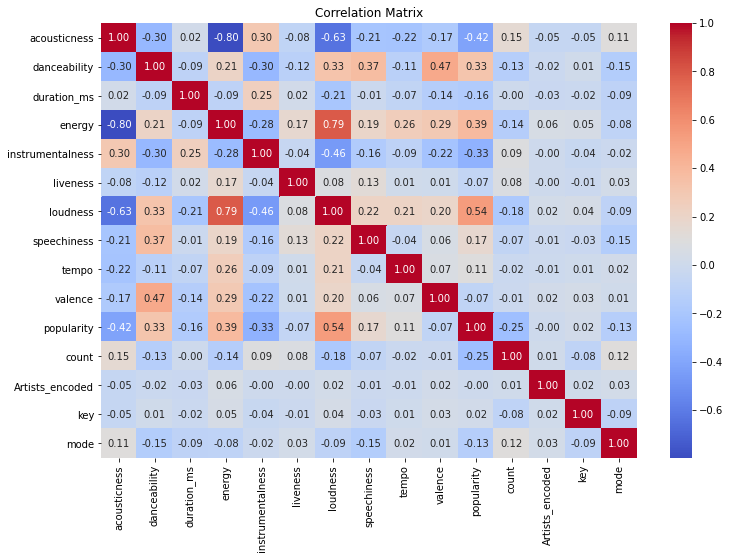

In [32]:
corr_matrix = X_train_scaled.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [33]:
corr_matrix = X_train_scaled.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
X_selected = X_train_scaled.drop(columns=to_drop)
X_selected

/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,acousticness,danceability,duration_ms,instrumentalness,liveness,speechiness,tempo,valence,popularity,count,Artists_encoded,key,mode
0,-0.577992,0.686295,0.683235,-0.463518,1.355703,-0.006016,0.019832,0.468020,0.133736,-0.018584,4093,5,0
1,-0.731851,0.362544,0.359663,-0.462981,-1.227454,-0.642157,0.297761,0.669181,-0.270294,-0.263442,795,4,1
2,0.746930,0.360494,-0.531952,-0.463529,-0.030058,-0.663310,0.555861,-0.286911,-0.342532,0.144654,2240,4,1
3,-0.814370,0.536825,-0.567066,-0.462508,0.021320,0.206359,-0.226912,0.408453,1.367061,0.253480,3886,0,1
4,0.319500,-0.849226,0.234243,0.692151,-0.327963,-0.569755,-0.467973,0.782811,-0.578607,-0.372267,777,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15305,2.014037,0.300867,0.341405,-0.463532,-1.181648,-0.558145,-0.028976,-0.553695,0.843057,-0.453886,4718,4,1
15306,-0.256262,1.197109,-0.196190,-0.462485,-0.206194,0.153800,0.453433,0.644692,1.049305,0.838417,6250,7,0
15307,1.440459,-1.964127,-1.228116,-0.460782,-0.333698,-0.643028,-0.419858,-0.824134,-1.565207,0.063035,3776,7,1
15308,-0.668442,1.665016,0.894906,-0.455398,0.206987,2.982961,-1.743804,-0.515818,0.706029,-0.467489,6487,5,0


In [34]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

feature_importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train_scaled.columns, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top Features Selected by Random Forest:")
print(feature_importance_df)

Top Features Selected by Random Forest:
             Feature  Importance
10        popularity    0.081620
7        speechiness    0.080651
0       acousticness    0.080325
1       danceability    0.079380
2        duration_ms    0.078937
9            valence    0.074997
3             energy    0.073388
6           loudness    0.072826
4   instrumentalness    0.069403
8              tempo    0.066020
12   Artists_encoded    0.064008
5           liveness    0.063934
11             count    0.058138
13               key    0.044521
14              mode    0.011851


In [68]:
X_train_scaled1 = X_train_scaled.drop(columns=['mode','energy'])
X_valid_scaled1 = X_valid_scaled.drop(columns=['mode','energy'])
X_test_scaled1 = X_test_scaled.drop(columns=['mode','energy'])

In [69]:
X_train_scaled1

,acousticness,danceability,duration_ms,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,count,Artists_encoded,key
0,-0.577992,0.686295,0.683235,-0.463518,1.355703,-0.612333,-0.006016,0.019832,0.468020,0.133736,-0.018584,4093,5
1,-0.731851,0.362544,0.359663,-0.462981,-1.227454,-0.280344,-0.642157,0.297761,0.669181,-0.270294,-0.263442,795,4
2,0.746930,0.360494,-0.531952,-0.463529,-0.030058,0.166498,-0.663310,0.555861,-0.286911,-0.342532,0.144654,2240,4
3,-0.814370,0.536825,-0.567066,-0.462508,0.021320,0.963548,0.206359,-0.226912,0.408453,1.367061,0.253480,3886,0
4,0.319500,-0.849226,0.234243,0.692151,-0.327963,0.405750,-0.569755,-0.467973,0.782811,-0.578607,-0.372267,777,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15305,2.014037,0.300867,0.341405,-0.463532,-1.181648,0.047263,-0.558145,-0.028976,-0.553695,0.843057,-0.453886,4718,4
15306,-0.256262,1.197109,-0.196190,-0.462485,-0.206194,1.056213,0.153800,0.453433,0.644692,1.049305,0.838417,6250,7
15307,1.440459,-1.964127,-1.228116,-0.460782,-0.333698,-0.787261,-0.643028,-0.419858,-0.824134,-1.565207,0.063035,3776,7
15308,-0.668442,1.665016,0.894906,-0.455398,0.206987,-0.213386,2.982961,-1.743804,-0.515818,0.706029,-0.467489,6487,5


In [70]:
y_train.unique()

array(['neo soul', 'new romantic', 'country road', 'pop', 'indie pop',
       'alternative metal', 'electronica', 'rap', 'electropop',
       'pop rock', 'brill building pop', 'big band', 'funk', 'classical',
       'show tunes', 'soft rock', 'folk rock', 'rock', 'dance pop',
       'new wave pop', 'country rock', 'southern hip hop', 'hard rock',
       'hip hop', 'ccm', 'hollywood', 'lounge', 'neo mellow',
       'stomp and holler', 'punk', 'nuevo regional mexicano', 'pop rap',
       'hardcore hip hop', 'underground hip hop', 'alternative rock',
       'motown', 'bebop', 'soul', 'regional mexican', 'adult standards',
       'pop punk', 'bubblegum pop', 'edm', 'disco', 'new americana',
       'latin pop', 'indie folk', 'trap latino', 'tropical', 'folk',
       'alternative hip hop', 'jazz', 'modern rock',
       'contemporary post-bop', 'urban contemporary', 'traditional folk',
       'country', 'filmi', 'hip pop', 'classic rock', 'pop dance',
       'mellow gold', 'classical performa

In [71]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score

k_values = [3, 5, 7, 9, 11, 13, 15, 17, 19]

for k in k_values:
    # Initialize the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training set
    knn_classifier.fit(X_train_scaled1, y_train)


    # Make predictions on the additional validation set
    y_pred_val1 = knn_classifier.predict(X_valid_scaled1)
    accuracy_val1 = accuracy_score(y_valid, y_pred_val1)
    
    y_pred_test1 = knn_classifier.predict(X_test_scaled1)
    accuracy_test1 = accuracy_score(y_test, y_pred_val1)
    

    # Print the performance for each k on both test and additional validation sets
    print(f'Accuracy for k={k}: Additional Validation Set: {accuracy_val1:.2f}')
    print(f'Accuracy for k={k}: Additional Test Set: {accuracy_test1:.2f}')
    '''print('\nClassification Report:')
    print(classification_report(y_valid, y_pred_val1))
    print('\n---------------------------\n')'''

Accuracy for k=3: Additional Validation Set: 0.02
Accuracy for k=3: Additional Test Set: 0.01
Accuracy for k=5: Additional Validation Set: 0.02
Accuracy for k=5: Additional Test Set: 0.01
Accuracy for k=7: Additional Validation Set: 0.02
Accuracy for k=7: Additional Test Set: 0.01
Accuracy for k=9: Additional Validation Set: 0.02
Accuracy for k=9: Additional Test Set: 0.01
Accuracy for k=11: Additional Validation Set: 0.02
Accuracy for k=11: Additional Test Set: 0.01
Accuracy for k=13: Additional Validation Set: 0.03
Accuracy for k=13: Additional Test Set: 0.01
Accuracy for k=15: Additional Validation Set: 0.03
Accuracy for k=15: Additional Test Set: 0.01
Accuracy for k=17: Additional Validation Set: 0.03
Accuracy for k=17: Additional Test Set: 0.01
Accuracy for k=19: Additional Validation Set: 0.03
Accuracy for k=19: Additional Test Set: 0.01


In [75]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score

adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training set
adaboost_classifier.fit(X_train_scaled1, y_train)

# Make predictions on the validation set
y_pred_valid = adaboost_classifier.predict(X_valid_scaled1)
y_pred_test = adaboost_classifier.predict(X_test_scaled1)

# Evaluate the performance on the validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print(f'Accuracy on Validation Set: {accuracy_valid:.2f}')

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy on Test Set: {accuracy_test:.2f}')

# Display additional evaluation metrics
print('\nClassification Report on Validation Set:')
print(classification_report(y_valid, y_pred_valid))

print('\nClassification Report on Test Set:')
print(classification_report(y_test, y_pred_test))


Accuracy on Validation Set: 0.06
Accuracy on Test Set: 0.00

Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.00      0.00      0.00        63
           2       0.00      0.00      0.00        41
           3       0.00      0.00      0.00        54
           4       0.00      0.00      0.00        61
           5       0.00      0.00      0.00        46
           6       0.08      0.18      0.11        28
           7       0.03      0.10      0.04        20
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00        34
          10       0.00      0.00      0.00        24
          11       0.00      0.00      0.00        20
          12       0.00      0.00      0.00        47
          13       0.00      0.00      0.00        41
          14       0.00      0.00      0.00        30
          15       0.23      0.88

/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: Mix of label input types (string and number)

In [74]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.multiclass import OneVsOneClassifier

train_df['target'] = train_df['genres'].astype('category').cat.codes

# Extract features and target variable
X = train_df.drop(columns=['genres', 'target'])  # Features
y = train_df['target']  # Numeric target variable

# Split the data into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

artists_encoded_train = X_train[['Artists_encoded', 'key', 'mode']]
artists_encoded_valid = X_valid[['Artists_encoded', 'key', 'mode']]
X_train = X_train.drop(columns=['Artists_encoded', 'key', 'mode'])
X_valid = X_valid.drop(columns=['Artists_encoded', 'key', 'mode'])

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)

artists_encoded_train = artists_encoded_train.reset_index(drop=True)
artists_encoded_valid = artists_encoded_valid.reset_index(drop=True)

X_train_scaled[['Artists_encoded', 'key', 'mode']] = artists_encoded_train
X_valid_scaled[['Artists_encoded', 'key', 'mode']] = artists_encoded_valid

X_train_scaled1 = X_train_scaled.drop(columns=['mode', 'energy'])
X_valid_scaled1 = X_valid_scaled.drop(columns=['mode', 'energy'])

# Check if the data is textual or numerical
is_text_data = isinstance(X_train_scaled1.iloc[0, 0], str)

# Initialize the Naive Bayes classifier
if is_text_data:
    naive_bayes_classifier = OneVsOneClassifier(MultinomialNB())
else:
    naive_bayes_classifier = OneVsOneClassifier(GaussianNB())

# Train the classifier on the training set
naive_bayes_classifier.fit(X_train_scaled1, y_train)

# Make predictions on the test set
y_pred_valid = naive_bayes_classifier.predict(X_valid_scaled1)
y_pred_test = naive_bayes_classifier.predict(X_test_scaled1)

# Evaluate the performance on the test set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print(f'Validation Accuracy using Naive Bayes: {accuracy_valid:.2f}')

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy using Naive Bayes: {accuracy_test:.2f}')


Validation Accuracy using Naive Bayes: 0.11
Test Accuracy using Naive Bayes: 0.00


In [76]:

X = train_df.drop(columns=['genres'])  # Features

# Iterate over all unique genres
for genre_of_interest in train_df['genres'].unique():
    # Create a binary target variable for one-vs-all classification
    train_df['target'] = (train_df['genres'] == genre_of_interest).astype(int)

    # Extract features and target variable
    X = train_df.drop(columns=['genres', 'target'])  # Features
    y = train_df['target']  # Binary target variable

    # Split the data into training and testing sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
    
    artists_encoded_train = X_train[['Artists_encoded','key','mode']]
    artists_encoded_valid = X_valid[['Artists_encoded','key','mode']]
    X_train = X_train.drop(columns=['Artists_encoded','key','mode'])
    X_valid = X_valid.drop(columns=['Artists_encoded','key','mode'])
    
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)

    artists_encoded_train = artists_encoded_train.reset_index(drop=True)
    artists_encoded_valid = artists_encoded_valid.reset_index(drop=True)

    X_train_scaled[['Artists_encoded','key','mode']] = artists_encoded_train
    X_valid_scaled[['Artists_encoded','key','mode']] = artists_encoded_valid
    
    X_train_scaled1 = X_train_scaled.drop(columns=['mode','energy'])
    X_valid_scaled1 = X_valid_scaled.drop(columns=['mode','energy'])
    # Initialize the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Adjust k as needed

    # Train the classifier on the training set
    knn_classifier.fit(X_train_scaled1, y_train)

    # Make predictions on the test set
    y_pred_valid = knn_classifier.predict(X_valid_scaled1)
    y_pred_test = knn_classifier.predict(X_test_scaled1)

    # Evaluate the performance on the test set
    accuracy_valid = accuracy_score(y_valid, y_pred_valid)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    
    print(f'Validation Accuracy for {genre_of_interest}: {accuracy_valid:.2f}, Test Accuracy: {accuracy_test:.2f} ')
    
    

Validation Accuracy for dance rock: 0.99, Test Accuracy: 0.00 
Validation Accuracy for classic rock: 0.99, Test Accuracy: 0.00 
Validation Accuracy for dance pop: 0.98, Test Accuracy: 0.00 
Validation Accuracy for pop punk: 0.99, Test Accuracy: 0.00 
Validation Accuracy for modern alternative rock: 0.99, Test Accuracy: 0.00 
Validation Accuracy for traditional folk: 0.99, Test Accuracy: 0.00 
Validation Accuracy for roots rock: 0.99, Test Accuracy: 0.00 
Validation Accuracy for pop: 0.98, Test Accuracy: 0.00 
Validation Accuracy for indie rock: 0.99, Test Accuracy: 0.00 
Validation Accuracy for country road: 0.99, Test Accuracy: 0.00 
Validation Accuracy for hip hop: 0.98, Test Accuracy: 0.00 
Validation Accuracy for southern hip hop: 0.98, Test Accuracy: 0.00 
Validation Accuracy for adult standards: 0.98, Test Accuracy: 0.00 
Validation Accuracy for pop rock: 0.99, Test Accuracy: 0.00 
Validation Accuracy for album rock: 0.98, Test Accuracy: 0.00 
Validation Accuracy for nu metal: 0.

In [78]:
for genre_of_interest in train_df['genres'].unique():
    # Create a binary target variable for one-vs-all classification
    train_df['target'] = (train_df['genres'] == genre_of_interest).astype(int)

    # Extract features and target variable
    X = train_df.drop(columns=['genres', 'target'])  # Features
    y = train_df['target']  # Binary target variable

    # Split the data into training and testing sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    artists_encoded_train = X_train[['Artists_encoded', 'key', 'mode']]
    artists_encoded_valid = X_valid[['Artists_encoded', 'key', 'mode']]
    X_train = X_train.drop(columns=['Artists_encoded', 'key', 'mode'])
    X_valid = X_valid.drop(columns=['Artists_encoded', 'key', 'mode'])

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)

    artists_encoded_train = artists_encoded_train.reset_index(drop=True)
    artists_encoded_valid = artists_encoded_valid.reset_index(drop=True)

    X_train_scaled[['Artists_encoded', 'key', 'mode']] = artists_encoded_train
    X_valid_scaled[['Artists_encoded', 'key', 'mode']] = artists_encoded_valid

    X_train_scaled1 = X_train_scaled.drop(columns=['mode', 'energy'])
    X_valid_scaled1 = X_valid_scaled.drop(columns=['mode', 'energy'])




    # Initialize the AdaBoost classifier with a base estimator (you can change the base estimator as needed)
    #base_estimator = KNeighborsClassifier(n_neighbors=5)  # Adjust k as needed
    adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

    # Train the AdaBoost classifier on the training set
    adaboost_classifier.fit(X_train_scaled1, y_train)

    # Make predictions on the test set
    y_pred_valid = adaboost_classifier.predict(X_valid_scaled1)
    y_pred_test = adaboost_classifier.predict(X_test_scaled1)
    
    # Evaluate the performance on the test set
    accuracy_valid = accuracy_score(y_valid, y_pred_valid)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print(f'Accuracy for {genre_of_interest} using AdaBoost: {accuracy_valid:.2f},Test Accuracy: {accuracy_test:.2f} ')


Accuracy for dance rock using AdaBoost: 0.99,Test Accuracy: 0.00 
Accuracy for classic rock using AdaBoost: 0.99,Test Accuracy: 0.00 
Accuracy for dance pop using AdaBoost: 0.98,Test Accuracy: 0.00 
Accuracy for pop punk using AdaBoost: 0.99,Test Accuracy: 0.00 
Accuracy for modern alternative rock using AdaBoost: 0.99,Test Accuracy: 0.00 
Accuracy for traditional folk using AdaBoost: 0.99,Test Accuracy: 0.00 
Accuracy for roots rock using AdaBoost: 0.99,Test Accuracy: 0.00 
Accuracy for pop using AdaBoost: 0.98,Test Accuracy: 0.00 
Accuracy for indie rock using AdaBoost: 0.99,Test Accuracy: 0.00 
Accuracy for country road using AdaBoost: 0.99,Test Accuracy: 0.00 
Accuracy for hip hop using AdaBoost: 0.98,Test Accuracy: 0.00 
Accuracy for southern hip hop using AdaBoost: 0.98,Test Accuracy: 0.00 
Accuracy for adult standards using AdaBoost: 0.98,Test Accuracy: 0.00 
Accuracy for pop rock using AdaBoost: 0.99,Test Accuracy: 0.00 
Accuracy for album rock using AdaBoost: 0.98,Test Accurac

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
import pandas as pd

# Assuming you have 'train_df' DataFrame with features and 'genres' as the target variable

# Iterate over all unique genres
for genre_of_interest in train_df['genres'].unique():
    # Create a binary target variable for one-vs-all classification
    train_df['target'] = (train_df['genres'] == genre_of_interest).astype(int)

    # Extract features and target variable
    X = train_df.drop(columns=['genres', 'target'])  # Features
    y = train_df['target']  # Binary target variable

    # Split the data into training and testing sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    artists_encoded_train = X_train[['Artists_encoded', 'key', 'mode']]
    artists_encoded_valid = X_valid[['Artists_encoded', 'key', 'mode']]
    X_train = X_train.drop(columns=['Artists_encoded', 'key', 'mode'])
    X_valid = X_valid.drop(columns=['Artists_encoded', 'key', 'mode'])

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)

    artists_encoded_train = artists_encoded_train.reset_index(drop=True)
    artists_encoded_valid = artists_encoded_valid.reset_index(drop=True)

    X_train_scaled[['Artists_encoded', 'key', 'mode']] = artists_encoded_train
    X_valid_scaled[['Artists_encoded', 'key', 'mode']] = artists_encoded_valid

    X_train_scaled1 = X_train_scaled.drop(columns=['mode', 'energy'])
    X_valid_scaled1 = X_valid_scaled.drop(columns=['mode', 'energy'])

    # Initialize the AdaBoost classifier
    param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5, 1.0]}
    adaboost_classifier = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, scoring='precision', cv=5)

    # Train the AdaBoost classifier on the training set
    adaboost_classifier.fit(X_train_scaled1, y_train)

    # Make predictions on the test set
    y_pred_test = adaboost_classifier.predict(X_valid_scaled1)

    # Evaluate the precision on the test set
    precision_test = precision_score(y_valid, y_pred_test)
    print(f'Precision for {genre_of_interest} using AdaBoost: {precision_test:.2f}')
    
    # Print the best hyperparameters found during grid search
    print(f'Best hyperparameters for {genre_of_interest}: {adaboost_classifier.best_params_}')


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics

/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics

Precision for dance rock using AdaBoost: 0.00
Best hyperparameters for dance rock: {'learning_rate': 1.0, 'n_estimators': 200}


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics

/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics

Precision for classic rock using AdaBoost: 0.00
Best hyperparameters for classic rock: {'learning_rate': 1.0, 'n_estimators': 200}


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics

KeyboardInterrupt: 

In [44]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB


# Assuming you have 'train_df' DataFrame with features and 'genres' as the target variable

# Iterate over all unique genres
for genre_of_interest in train_df['genres'].unique():
    # Create a binary target variable for one-vs-all classification
    train_df['target'] = (train_df['genres'] == genre_of_interest).astype(int)

    # Extract features and target variable
    X = train_df.drop(columns=['genres', 'target'])  # Features
    y = train_df['target']  # Binary target variable

    # Split the data into training and testing sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    artists_encoded_train = X_train[['Artists_encoded', 'key', 'mode']]
    artists_encoded_valid = X_valid[['Artists_encoded', 'key', 'mode']]
    X_train = X_train.drop(columns=['Artists_encoded', 'key', 'mode'])
    X_valid = X_valid.drop(columns=['Artists_encoded', 'key', 'mode'])

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)

    artists_encoded_train = artists_encoded_train.reset_index(drop=True)
    artists_encoded_valid = artists_encoded_valid.reset_index(drop=True)

    X_train_scaled[['Artists_encoded', 'key', 'mode']] = artists_encoded_train
    X_valid_scaled[['Artists_encoded', 'key', 'mode']] = artists_encoded_valid

    X_train_scaled1 = X_train_scaled.drop(columns=['mode', 'energy'])
    X_valid_scaled1 = X_valid_scaled.drop(columns=['mode', 'energy'])

    # Check if the data is textual or numerical
    is_text_data = isinstance(X_train_scaled1.iloc[0, 0], str)

    # Initialize the Naive Bayes classifier
    if is_text_data:
        naive_bayes_classifier = MultinomialNB()
    else:
        naive_bayes_classifier = GaussianNB()

    # Train the classifier on the training set
    naive_bayes_classifier.fit(X_train_scaled1, y_train)

    # Make predictions on the test set
    y_pred_test = naive_bayes_classifier.predict(X_valid_scaled1)

    # Evaluate the performance on the test set
    accuracy_test = accuracy_score(y_valid, y_pred_test)
    precision_test = precision_score(y_valid, y_pred_test)
    print(f'Accuracy for {genre_of_interest} using Naive Bayes: {accuracy_test:.2f} ')
    print(f'Precision for {genre_of_interest} using Naive Bayes: {precision_test:.2f} ')


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy for dance rock using Naive Bayes: 0.99 
Precision for dance rock using Naive Bayes: 0.00 
Accuracy for classic rock using Naive Bayes: 0.97 
Precision for classic rock using Naive Bayes: 0.07 
Accuracy for dance pop using Naive Bayes: 0.87 
Precision for dance pop using Naive Bayes: 0.10 
Accuracy for pop punk using Naive Bayes: 0.97 
Precision for pop punk using Naive Bayes: 0.09 
Accuracy for modern alternative rock using Naive Bayes: 0.96 
Precision for modern alternative rock using Naive Bayes: 0.01 
Accuracy for traditional folk using Naive Bayes: 0.97 
Precision for traditional folk using Naive Bayes: 0.09 
Accuracy for roots rock using Naive Bayes: 0.98 
Precision for roots rock using Naive Bayes: 0.04 
Accuracy for pop using Naive Bayes: 0.91 
Precision for pop using Naive Bayes: 0.12 
Accuracy for indie rock using Naive Bayes: 0.97 
Precision for indie rock using Naive Bayes: 0.08 
Accuracy for country road using Naive Bayes: 0.93 
Precision for country road using Nai

/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy for pop rap using Naive Bayes: 0.89 
Precision for pop rap using Naive Bayes: 0.08 
Accuracy for tropical house using Naive Bayes: 0.95 
Precision for tropical house using Naive Bayes: 0.05 
Accuracy for soul using Naive Bayes: 0.99 
Precision for soul using Naive Bayes: 0.08 
Accuracy for classic soul using Naive Bayes: 0.99 
Precision for classic soul using Naive Bayes: 0.00 
Accuracy for filmi using Naive Bayes: 0.96 
Precision for filmi using Naive Bayes: 0.02 
Accuracy for neo soul using Naive Bayes: 0.92 
Precision for neo soul using Naive Bayes: 0.02 
Accuracy for lounge using Naive Bayes: 0.92 
Precision for lounge using Naive Bayes: 0.04 
Accuracy for rap using Naive Bayes: 0.89 
Precision for rap using Naive Bayes: 0.13 
Accuracy for jazz funk using Naive Bayes: 0.97 
Precision for jazz funk using Naive Bayes: 0.10 
Accuracy for indie pop using Naive Bayes: 0.98 
Precision for indie pop using Naive Bayes: 0.04 
Accuracy for metal using Naive Bayes: 0.98 
Precision fo

/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy for post-disco using Naive Bayes: 0.97 
Precision for post-disco using Naive Bayes: 0.16 
Accuracy for soft rock using Naive Bayes: 0.95 
Precision for soft rock using Naive Bayes: 0.07 
Accuracy for trap latino using Naive Bayes: 0.98 
Precision for trap latino using Naive Bayes: 0.08 
Accuracy for new wave using Naive Bayes: 0.99 
Precision for new wave using Naive Bayes: 0.12 
Accuracy for punk using Naive Bayes: 0.98 
Precision for punk using Naive Bayes: 0.21 
Accuracy for neo mellow using Naive Bayes: 0.95 
Precision for neo mellow using Naive Bayes: 0.04 
Accuracy for contemporary country using Naive Bayes: 0.99 
Precision for contemporary country using Naive Bayes: 0.17 
Accuracy for alternative hip hop using Naive Bayes: 0.95 
Precision for alternative hip hop using Naive Bayes: 0.12 
Accuracy for nuevo regional mexicano using Naive Bayes: 0.95 
Precision for nuevo regional mexicano using Naive Bayes: 0.07 
Accuracy for big band using Naive Bayes: 0.93 
Precision for 

In [45]:
genre_counts = y_train.value_counts()

# Print the count for each genre
for genre, count in genre_counts.items():
    print(f'Genre: {genre}, Count: {count}')

Genre: 0, Count: 16229
Genre: 1, Count: 102


In [48]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the XGBoost classifier on the training set
xgb_classifier.fit(X_train_scaled1, y_train)

# Make predictions on the validation set
y_pred_valid_xgb = xgb_classifier.predict(X_valid_scaled1)

# Evaluate the performance on the validation set
accuracy_valid_xgb = accuracy_score(y_valid, y_pred_valid_xgb)
print(f'Accuracy on Validation Set (XGBoost): {accuracy_valid_xgb:.2f}')

# Display additional evaluation metrics for XGBoost
print('\nClassification Report on Validation Set (XGBoost):')
print(classification_report(y_valid, y_pred_valid_xgb))

# Calculate and print precision and recall for XGBoost
precision_xgb = precision_score(y_valid, y_pred_valid_xgb, average='weighted')
print(f'Weighted Precision on Validation Set (XGBoost): {precision_xgb:.2f}')

[12:22:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on Validation Set (XGBoost): 0.99

Classification Report on Validation Set (XGBoost):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4059
           1       0.00      0.00      0.00        24

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

Weighted Precision on Validation Set (XGBoost): 0.99


In [49]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier

# Assuming train_df is your DataFrame containing the dataset

for genre_of_interest in train_df['genres'].unique():
    # Create a binary target variable for one-vs-all classification
    train_df['target'] = (train_df['genres'] == genre_of_interest).astype(int)

    # Extract features and target variable
    X = train_df.drop(columns=['genres', 'target'])  # Features
    y = train_df['target']  # Binary target variable

    # Split the data into training and testing sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    artists_encoded_train = X_train[['Artists_encoded', 'key', 'mode']]
    artists_encoded_valid = X_valid[['Artists_encoded', 'key', 'mode']]
    X_train = X_train.drop(columns=['Artists_encoded', 'key', 'mode'])
    X_valid = X_valid.drop(columns=['Artists_encoded', 'key', 'mode'])

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)

    artists_encoded_train = artists_encoded_train.reset_index(drop=True)
    artists_encoded_valid = artists_encoded_valid.reset_index(drop=True)

    X_train_scaled[['Artists_encoded', 'key', 'mode']] = artists_encoded_train
    X_valid_scaled[['Artists_encoded', 'key', 'mode']] = artists_encoded_valid

    # Drop 'mode' and 'energy' columns
    X_train_scaled1 = X_train_scaled.drop(columns=['mode', 'energy'])
    X_valid_scaled1 = X_valid_scaled.drop(columns=['mode', 'energy'])

    # Initialize the XGBoost classifier
    xgb_classifier = xgb.XGBClassifier(n_estimators=50, random_state=42)

    # Train the XGBoost classifier on the training set
    xgb_classifier.fit(X_train_scaled1, y_train)

    # Make predictions on the validation set
    y_pred_valid_xgb = xgb_classifier.predict(X_valid_scaled1)

    # Evaluate the performance on the validation set
    accuracy_valid_xgb = accuracy_score(y_valid, y_pred_valid_xgb)
    print(f'Accuracy for {genre_of_interest} using XGBoost: {accuracy_valid_xgb:.2f}')

    # Display additional evaluation metrics for XGBoost
    print(f'Classification Report for {genre_of_interest} using XGBoost:')
    print(classification_report(y_valid, y_pred_valid_xgb))


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:23:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy for dance rock using XGBoost: 0.99
Classification Report for dance rock using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4048
           1       0.00      0.00      0.00        35

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.98      0.99      0.99      4083

[12:23:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for classic rock using XGBoost: 0.99
Classification Report for classic rock using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4036
           1       0.00      0.00      0.00        47

    accuracy                           0.99      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.98      0.99      0.98      4083

[12:23:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for dance pop using XGBoost: 0.98
Classification Report for dance pop using XGBoost:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3987
           1       0.00      0.00      0.00        96

    accuracy                           0.98      4083
   macro avg       0.49      0.50      0.49      4083
weighted avg       0.95      0.98      0.96      4083

[12:23:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for pop punk using XGBoost: 0.99
Classification Report for pop punk using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4051
           1       0.00      0.00      0.00        32

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.98      0.99      0.99      4083

[12:23:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for modern alternative rock using XGBoost: 0.99
Classification Report for modern alternative rock using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4058
           1       0.00      0.00      0.00        25

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:23:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for traditional folk using XGBoost: 0.99
Classification Report for traditional folk using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4055
           1       0.00      0.00      0.00        28

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:23:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for roots rock using XGBoost: 0.99
Classification Report for roots rock using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4034
           1       0.00      0.00      0.00        49

    accuracy                           0.99      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.98      0.99      0.98      4083

[12:23:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for pop using XGBoost: 0.98
Classification Report for pop using XGBoost:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3990
           1       0.20      0.02      0.04        93

    accuracy                           0.98      4083
   macro avg       0.59      0.51      0.51      4083
weighted avg       0.96      0.98      0.97      4083

[12:23:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for indie rock using XGBoost: 0.98
Classification Report for indie rock using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4033
           1       0.00      0.00      0.00        50

    accuracy                           0.98      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.98      0.98      0.98      4083

[12:23:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for country road using XGBoost: 0.99
Classification Report for country road using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4052
           1       0.00      0.00      0.00        31

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.98      0.99      0.99      4083

[12:23:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for hip hop using XGBoost: 0.98
Classification Report for hip hop using XGBoost:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4018
           1       0.00      0.00      0.00        65

    accuracy                           0.98      4083
   macro avg       0.49      0.50      0.49      4083
weighted avg       0.97      0.98      0.97      4083

[12:23:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for southern hip hop using XGBoost: 0.98
Classification Report for southern hip hop using XGBoost:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4021
           1       0.00      0.00      0.00        62

    accuracy                           0.98      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.97      0.98      0.98      4083

[12:23:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for adult standards using XGBoost: 0.98
Classification Report for adult standards using XGBoost:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4014
           1       0.09      0.01      0.03        69

    accuracy                           0.98      4083
   macro avg       0.54      0.51      0.51      4083
weighted avg       0.97      0.98      0.97      4083

[12:23:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for pop rock using XGBoost: 0.99
Classification Report for pop rock using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4031
           1       0.00      0.00      0.00        52

    accuracy                           0.99      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.97      0.99      0.98      4083

[12:23:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for album rock using XGBoost: 0.98
Classification Report for album rock using XGBoost:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4020
           1       0.00      0.00      0.00        63

    accuracy                           0.98      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.97      0.98      0.98      4083

[12:23:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for nu metal using XGBoost: 0.99
Classification Report for nu metal using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4048
           1       0.00      0.00      0.00        35

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.98      0.99      0.99      4083

[12:23:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for dirty south rap using XGBoost: 0.99
Classification Report for dirty south rap using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4060
           1       0.00      0.00      0.00        23

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:23:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for electro house using XGBoost: 0.99
Classification Report for electro house using XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4063
           1       0.00      0.00      0.00        20

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:23:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for cool jazz using XGBoost: 0.99
Classification Report for cool jazz using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4052
           1       0.00      0.00      0.00        31

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.98      0.99      0.99      4083

[12:23:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for brill building pop using XGBoost: 0.99
Classification Report for brill building pop using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4049
           1       0.10      0.03      0.05        34

    accuracy                           0.99      4083
   macro avg       0.55      0.51      0.52      4083
weighted avg       0.98      0.99      0.99      4083

[12:23:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for trap using XGBoost: 0.98
Classification Report for trap using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4024
           1       0.00      0.00      0.00        59

    accuracy                           0.98      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.97      0.98      0.98      4083

[12:23:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for disco using XGBoost: 0.99
Classification Report for disco using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4048
           1       0.00      0.00      0.00        35

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.98      0.99      0.99      4083

[12:23:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for hip pop using XGBoost: 0.99
Classification Report for hip pop using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4042
           1       0.00      0.00      0.00        41

    accuracy                           0.99      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.98      0.99      0.98      4083

[12:23:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for alternative rock using XGBoost: 0.98
Classification Report for alternative rock using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4022
           1       0.00      0.00      0.00        61

    accuracy                           0.98      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.97      0.98      0.98      4083

[12:23:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for corrido using XGBoost: 0.98
Classification Report for corrido using XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4049
           1       0.03      0.03      0.03        34

    accuracy                           0.98      4083
   macro avg       0.51      0.51      0.51      4083
weighted avg       0.98      0.98      0.98      4083

[12:23:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for rock using XGBoost: 0.97
Classification Report for rock using XGBoost:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3988
           1       0.00      0.00      0.00        95

    accuracy                           0.97      4083
   macro avg       0.49      0.50      0.49      4083
weighted avg       0.95      0.97      0.96      4083

[12:23:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for latin hip hop using XGBoost: 0.99
Classification Report for latin hip hop using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4057
           1       0.00      0.00      0.00        26

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:23:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for edm using XGBoost: 0.98
Classification Report for edm using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4033
           1       0.00      0.00      0.00        50

    accuracy                           0.98      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.98      0.98      0.98      4083

[12:23:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for art rock using XGBoost: 0.99
Classification Report for art rock using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4037
           1       0.00      0.00      0.00        46

    accuracy                           0.99      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.98      0.99      0.98      4083

[12:23:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for tropical using XGBoost: 0.99
Classification Report for tropical using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4041
           1       0.20      0.07      0.11        42

    accuracy                           0.99      4083
   macro avg       0.60      0.53      0.55      4083
weighted avg       0.98      0.99      0.98      4083

[12:23:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for r&b using XGBoost: 0.99
Classification Report for r&b using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4035
           1       0.00      0.00      0.00        48

    accuracy                           0.99      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.98      0.99      0.98      4083

[12:23:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for country rock using XGBoost: 0.98
Classification Report for country rock using XGBoost:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4017
           1       0.00      0.00      0.00        66

    accuracy                           0.98      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.97      0.98      0.97      4083

[12:23:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for ccm using XGBoost: 1.00
Classification Report for ccm using XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4063
           1       0.60      0.15      0.24        20

    accuracy                           1.00      4083
   macro avg       0.80      0.57      0.62      4083
weighted avg       0.99      1.00      0.99      4083

[12:23:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for classic uk pop using XGBoost: 0.99
Classification Report for classic uk pop using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4053
           1       0.00      0.00      0.00        30

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:23:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for latin using XGBoost: 0.98
Classification Report for latin using XGBoost:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4019
           1       0.00      0.00      0.00        64

    accuracy                           0.98      4083
   macro avg       0.49      0.50      0.49      4083
weighted avg       0.97      0.98      0.97      4083

[12:23:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for movie tunes using XGBoost: 0.99
Classification Report for movie tunes using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4056
           1       0.14      0.04      0.06        27

    accuracy                           0.99      4083
   macro avg       0.57      0.52      0.53      4083
weighted avg       0.99      0.99      0.99      4083

[12:23:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for hard rock using XGBoost: 0.99
Classification Report for hard rock using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4040
           1       0.00      0.00      0.00        43

    accuracy                           0.99      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.98      0.99      0.98      4083

[12:23:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for jazz using XGBoost: 0.99
Classification Report for jazz using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4046
           1       0.00      0.00      0.00        37

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.98      0.99      0.99      4083

[12:23:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for blues rock using XGBoost: 0.99
Classification Report for blues rock using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4050
           1       0.00      0.00      0.00        33

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.98      0.99      0.99      4083

[12:23:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for gangster rap using XGBoost: 0.99
Classification Report for gangster rap using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4029
           1       0.00      0.00      0.00        54

    accuracy                           0.99      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.97      0.99      0.98      4083

[12:23:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for pop dance using XGBoost: 0.99
Classification Report for pop dance using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4038
           1       0.00      0.00      0.00        45

    accuracy                           0.99      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.98      0.99      0.98      4083

[12:23:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for underground hip hop using XGBoost: 0.99
Classification Report for underground hip hop using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4051
           1       0.25      0.12      0.17        32

    accuracy                           0.99      4083
   macro avg       0.62      0.56      0.58      4083
weighted avg       0.99      0.99      0.99      4083

[12:23:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for electronica using XGBoost: 0.99
Classification Report for electronica using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4049
           1       0.43      0.09      0.15        34

    accuracy                           0.99      4083
   macro avg       0.71      0.54      0.57      4083
weighted avg       0.99      0.99      0.99      4083

[12:23:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for psychedelic rock using XGBoost: 0.99
Classification Report for psychedelic rock using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4048
           1       0.12      0.03      0.05        35

    accuracy                           0.99      4083
   macro avg       0.56      0.51      0.52      4083
weighted avg       0.98      0.99      0.99      4083

[12:23:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for soul jazz using XGBoost: 0.99
Classification Report for soul jazz using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4055
           1       0.00      0.00      0.00        28

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:23:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for show tunes using XGBoost: 0.99
Classification Report for show tunes using XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4059
           1       0.27      0.17      0.21        24

    accuracy                           0.99      4083
   macro avg       0.63      0.58      0.60      4083
weighted avg       0.99      0.99      0.99      4083

[12:23:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for new americana using XGBoost: 0.99
Classification Report for new americana using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4057
           1       0.00      0.00      0.00        26

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:23:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for folk using XGBoost: 0.99
Classification Report for folk using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4057
           1       0.00      0.00      0.00        26

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:23:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for electropop using XGBoost: 0.99
Classification Report for electropop using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4044
           1       0.00      0.00      0.00        39

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.98      0.99      0.99      4083

[12:23:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for urban contemporary using XGBoost: 0.98
Classification Report for urban contemporary using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4023
           1       0.00      0.00      0.00        60

    accuracy                           0.98      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.97      0.98      0.98      4083

[12:24:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for bebop using XGBoost: 0.99
Classification Report for bebop using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4055
           1       0.00      0.00      0.00        28

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for alternative metal using XGBoost: 0.98
Classification Report for alternative metal using XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4029
           1       0.00      0.00      0.00        54

    accuracy                           0.98      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.97      0.98      0.98      4083

[12:24:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for folk rock using XGBoost: 0.98
Classification Report for folk rock using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4024
           1       0.00      0.00      0.00        59

    accuracy                           0.98      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.97      0.98      0.98      4083

[12:24:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for modern rock using XGBoost: 0.98
Classification Report for modern rock using XGBoost:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4011
           1       0.00      0.00      0.00        72

    accuracy                           0.98      4083
   macro avg       0.49      0.50      0.49      4083
weighted avg       0.97      0.98      0.97      4083

[12:24:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for contemporary post-bop using XGBoost: 0.99
Classification Report for contemporary post-bop using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4060
           1       0.00      0.00      0.00        23

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for hard bop using XGBoost: 0.99
Classification Report for hard bop using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4061
           1       0.00      0.00      0.00        22

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for indie folk using XGBoost: 0.99
Classification Report for indie folk using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4051
           1       0.00      0.00      0.00        32

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.98      0.99      0.99      4083

[12:24:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for post-teen pop using XGBoost: 0.98
Classification Report for post-teen pop using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4025
           1       0.00      0.00      0.00        58

    accuracy                           0.98      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.97      0.98      0.98      4083

[12:24:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for quiet storm using XGBoost: 0.99
Classification Report for quiet storm using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4039
           1       0.00      0.00      0.00        44

    accuracy                           0.99      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.98      0.99      0.98      4083

[12:24:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for country using XGBoost: 0.98
Classification Report for country using XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4032
           1       0.00      0.00      0.00        51

    accuracy                           0.98      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.98      0.98      0.98      4083

[12:24:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for hollywood using XGBoost: 0.99
Classification Report for hollywood using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4054
           1       0.00      0.00      0.00        29

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for pop rap using XGBoost: 0.98
Classification Report for pop rap using XGBoost:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4006
           1       0.00      0.00      0.00        77

    accuracy                           0.98      4083
   macro avg       0.49      0.50      0.49      4083
weighted avg       0.96      0.98      0.97      4083

[12:24:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for tropical house using XGBoost: 0.99
Classification Report for tropical house using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4057
           1       0.00      0.00      0.00        26

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for soul using XGBoost: 0.99
Classification Report for soul using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4043
           1       0.00      0.00      0.00        40

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.98      0.99      0.98      4083

[12:24:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for classic soul using XGBoost: 0.99
Classification Report for classic soul using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4042
           1       0.00      0.00      0.00        41

    accuracy                           0.99      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.98      0.99      0.98      4083

[12:24:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for filmi using XGBoost: 1.00
Classification Report for filmi using XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4066
           1       0.80      0.24      0.36        17

    accuracy                           1.00      4083
   macro avg       0.90      0.62      0.68      4083
weighted avg       1.00      1.00      1.00      4083

[12:24:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for neo soul using XGBoost: 0.99
Classification Report for neo soul using XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4063
           1       0.00      0.00      0.00        20

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for lounge using XGBoost: 0.99
Classification Report for lounge using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4053
           1       0.00      0.00      0.00        30

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for rap using XGBoost: 0.97
Classification Report for rap using XGBoost:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3992
           1       0.00      0.00      0.00        91

    accuracy                           0.97      4083
   macro avg       0.49      0.50      0.49      4083
weighted avg       0.96      0.97      0.96      4083

[12:24:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for jazz funk using XGBoost: 0.99
Classification Report for jazz funk using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4052
           1       0.00      0.00      0.00        31

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.98      0.99      0.99      4083

[12:24:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for indie pop using XGBoost: 0.99
Classification Report for indie pop using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4043
           1       0.00      0.00      0.00        40

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.98      0.99      0.98      4083

[12:24:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for metal using XGBoost: 0.99
Classification Report for metal using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4055
           1       0.00      0.00      0.00        28

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for motown using XGBoost: 0.99
Classification Report for motown using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4051
           1       0.00      0.00      0.00        32

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.98      0.99      0.99      4083

[12:24:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for regional mexican using XGBoost: 0.98
Classification Report for regional mexican using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4026
           1       0.09      0.04      0.05        57

    accuracy                           0.98      4083
   macro avg       0.54      0.52      0.52      4083
weighted avg       0.97      0.98      0.98      4083

[12:24:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for funk using XGBoost: 0.98
Classification Report for funk using XGBoost:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4017
           1       0.00      0.00      0.00        66

    accuracy                           0.98      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.97      0.98      0.98      4083

[12:24:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for classical using XGBoost: 0.99
Classification Report for classical using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4050
           1       0.50      0.30      0.38        33

    accuracy                           0.99      4083
   macro avg       0.75      0.65      0.69      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for classical performance using XGBoost: 0.99
Classification Report for classical performance using XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4042
           1       0.58      0.54      0.56        41

    accuracy                           0.99      4083
   macro avg       0.79      0.77      0.78      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for indie poptimism using XGBoost: 0.99
Classification Report for indie poptimism using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4058
           1       0.00      0.00      0.00        25

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for mellow gold using XGBoost: 0.98
Classification Report for mellow gold using XGBoost:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4013
           1       0.00      0.00      0.00        70

    accuracy                           0.98      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.97      0.98      0.97      4083

[12:24:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for vocal jazz using XGBoost: 0.99
Classification Report for vocal jazz using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4060
           1       0.00      0.00      0.00        23

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for rock en espanol using XGBoost: 0.99
Classification Report for rock en espanol using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4052
           1       0.00      0.00      0.00        31

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.98      0.99      0.99      4083

[12:24:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for stomp and holler using XGBoost: 0.99
Classification Report for stomp and holler using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4050
           1       0.00      0.00      0.00        33

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.98      0.99      0.99      4083

[12:24:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for hardcore hip hop using XGBoost: 0.99
Classification Report for hardcore hip hop using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4055
           1       0.08      0.04      0.05        28

    accuracy                           0.99      4083
   macro avg       0.54      0.52      0.52      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for new romantic using XGBoost: 0.99
Classification Report for new romantic using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4061
           1       0.00      0.00      0.00        22

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for latin pop using XGBoost: 0.99
Classification Report for latin pop using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4051
           1       0.00      0.00      0.00        32

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.98      0.99      0.99      4083

[12:24:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for reggaeton using XGBoost: 0.99
Classification Report for reggaeton using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4055
           1       0.00      0.00      0.00        28

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for new wave pop using XGBoost: 0.99
Classification Report for new wave pop using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4028
           1       0.00      0.00      0.00        55

    accuracy                           0.99      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.97      0.99      0.98      4083

[12:24:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for post-disco using XGBoost: 0.99
Classification Report for post-disco using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4051
           1       0.11      0.03      0.05        32

    accuracy                           0.99      4083
   macro avg       0.55      0.51      0.52      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for soft rock using XGBoost: 0.99
Classification Report for soft rock using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4028
           1       0.00      0.00      0.00        55

    accuracy                           0.99      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.97      0.99      0.98      4083

[12:24:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for trap latino using XGBoost: 0.99
Classification Report for trap latino using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4058
           1       0.06      0.04      0.05        25

    accuracy                           0.99      4083
   macro avg       0.53      0.52      0.52      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for new wave using XGBoost: 0.99
Classification Report for new wave using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4058
           1       0.00      0.00      0.00        25

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for punk using XGBoost: 0.99
Classification Report for punk using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4049
           1       0.27      0.12      0.16        34

    accuracy                           0.99      4083
   macro avg       0.63      0.56      0.58      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for neo mellow using XGBoost: 0.99
Classification Report for neo mellow using XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4064
           1       0.00      0.00      0.00        19

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for contemporary country using XGBoost: 0.99
Classification Report for contemporary country using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4042
           1       0.00      0.00      0.00        41

    accuracy                           0.99      4083
   macro avg       0.49      0.50      0.50      4083
weighted avg       0.98      0.99      0.98      4083

[12:24:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for alternative hip hop using XGBoost: 0.99
Classification Report for alternative hip hop using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4042
           1       0.10      0.02      0.04        41

    accuracy                           0.99      4083
   macro avg       0.55      0.51      0.52      4083
weighted avg       0.98      0.99      0.98      4083

[12:24:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for nuevo regional mexicano using XGBoost: 0.99
Classification Report for nuevo regional mexicano using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4058
           1       0.00      0.00      0.00        25

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for big band using XGBoost: 0.99
Classification Report for big band using XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4063
           1       0.33      0.05      0.09        20

    accuracy                           0.99      4083
   macro avg       0.66      0.52      0.54      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for new jack swing using XGBoost: 0.99
Classification Report for new jack swing using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4060
           1       0.00      0.00      0.00        23

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for rock-and-roll using XGBoost: 0.99
Classification Report for rock-and-roll using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4053
           1       0.00      0.00      0.00        30

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083

[12:24:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy for bubblegum pop using XGBoost: 0.99
Classification Report for bubblegum pop using XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4059
           1       0.00      0.00      0.00        24

    accuracy                           0.99      4083
   macro avg       0.50      0.50      0.50      4083
weighted avg       0.99      0.99      0.99      4083



In [50]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score

trained_scaled2=pd.read_csv('X_train_scaled2.csv')
X_train2 = trained_scaled2.drop(columns=['genre'])
y_train2 = trained_scaled2['genre']

valid_scaled2=pd.read_csv('X_valid_scaled2.csv')
X_valid2 = valid_scaled2.drop(columns=['genre'])
y_valid2 = valid_scaled2['genre']

k_values = [3, 5, 7, 9, 11, 13, 15, 17, 19]

for k in k_values:
    # Initialize the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training set
    knn_classifier.fit(X_train2, y_train2)


    # Make predictions on the additional validation set
    y_pred_val1 = knn_classifier.predict(X_valid2)
    accuracy_val1 = accuracy_score(y_valid2, y_pred_val1)
    #precision_val1=precision_score(y_valid2, y_pred_val1)
    

    # Print the performance for each k on both test and additional validation sets
    print(f'Accuracy for k={k}: Additional Validation Set: {accuracy_val1:.2f}')
    '''print('\nClassification Report:')
    print(classification_report(y_valid, y_pred_val1))
    print('\n---------------------------\n')'''

Accuracy for k=3: Additional Validation Set: 0.46
Accuracy for k=5: Additional Validation Set: 0.45
Accuracy for k=7: Additional Validation Set: 0.42
Accuracy for k=9: Additional Validation Set: 0.41
Accuracy for k=11: Additional Validation Set: 0.39
Accuracy for k=13: Additional Validation Set: 0.39
Accuracy for k=15: Additional Validation Set: 0.38
Accuracy for k=17: Additional Validation Set: 0.37
Accuracy for k=19: Additional Validation Set: 0.37


In [51]:
from sklearn.model_selection import train_test_split
X = trained_scaled2.drop(columns=['genre'])  # Features

# Iterate over all unique genres
for genre_of_interest in trained_scaled2['genre'].unique():
    # Create a binary target variable for one-vs-all classification
    trained_scaled2['target'] = (trained_scaled2['genre'] == genre_of_interest).astype(int)

    # Extract features and target variable
    X = trained_scaled2.drop(columns=['genre', 'target'])  # Features
    y = trained_scaled2['target']  # Binary target variable

    # Split the data into training and testing sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
    
    artists_encoded_train = X_train[['Artists_encoded','key']]
    artists_encoded_valid = X_valid[['Artists_encoded','key']]
    X_train = X_train.drop(columns=['Artists_encoded','key'])
    X_valid = X_valid.drop(columns=['Artists_encoded','key'])
    
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)

    artists_encoded_train = artists_encoded_train.reset_index(drop=True)
    artists_encoded_valid = artists_encoded_valid.reset_index(drop=True)

    X_train_scaled[['Artists_encoded','key']] = artists_encoded_train
    X_valid_scaled[['Artists_encoded','key']] = artists_encoded_valid
   
    # Initialize the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Adjust k as needed

    # Train the classifier on the training set
    knn_classifier.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred_test = knn_classifier.predict(X_valid_scaled)

    # Evaluate the performance on the test set
    accuracy_test = accuracy_score(y_valid, y_pred_test)
    precision_test = precision_score(y_valid, y_pred_test)
    
    print(f'Accuracy for {genre_of_interest}: {accuracy_test:.2f},Precision: {precision_test:.2f}')

Accuracy for Jazz and Blues: 0.91,Precision: 0.63
Accuracy for Pop and Dance: 0.71,Precision: 0.53
Accuracy for Country and Americana: 0.88,Precision: 0.30
Accuracy for Hip Hop and Rap: 0.88,Precision: 0.63
Accuracy for Soul, R&B, and Related Genres: 0.90,Precision: 0.27
Accuracy for Rock and Alternative: 0.80,Precision: 0.50
Accuracy for Latin, Tropical, and Regional Varieties: 0.94,Precision: 0.42


In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training set
adaboost_classifier.fit(X_train2, y_train2)

# Make predictions on the validation set
y_pred_valid = adaboost_classifier.predict(X_valid2)

# Evaluate the performance on the validation set
accuracy_valid = accuracy_score(y_valid2, y_pred_valid)
print(f'Accuracy on Validation Set: {accuracy_valid:.2f}')

# Display additional evaluation metrics
print('\nClassification Report on Validation Set:')
print(classification_report(y_valid2, y_pred_valid))

Accuracy on Validation Set: 0.48

Classification Report on Validation Set:
                                         precision    recall  f1-score   support

                  Country and Americana       0.32      0.17      0.22       443
                        Hip Hop and Rap       0.57      0.75      0.65       624
                         Jazz and Blues       0.54      0.59      0.56       481
Latin, Tropical, and Regional Varieties       0.46      0.36      0.40       272
                          Pop and Dance       0.43      0.52      0.47      1314
                   Rock and Alternative       0.50      0.52      0.51       913
          Soul, R&B, and Related Genres       0.34      0.09      0.14       385

                               accuracy                           0.48      4432
                              macro avg       0.45      0.43      0.42      4432
                           weighted avg       0.46      0.48      0.46      4432



In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
import pandas as pd

X = trained_scaled2.drop(columns=['genre'])  # Features

# Iterate over all unique genres
for genre_of_interest in trained_scaled2['genre'].unique():
    # Create a binary target variable for one-vs-all classification
    trained_scaled2['target'] = (trained_scaled2['genre'] == genre_of_interest).astype(int)

    # Extract features and target variable
    X = trained_scaled2.drop(columns=['genre', 'target'])  # Features
    y = trained_scaled2['target']  # Binary target variable

    # Split the data into training and testing sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
    
    artists_encoded_train = X_train[['Artists_encoded','key']]
    artists_encoded_valid = X_valid[['Artists_encoded','key']]
    X_train = X_train.drop(columns=['Artists_encoded','key'])
    X_valid = X_valid.drop(columns=['Artists_encoded','key'])
    
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)

    artists_encoded_train = artists_encoded_train.reset_index(drop=True)
    artists_encoded_valid = artists_encoded_valid.reset_index(drop=True)

    X_train_scaled[['Artists_encoded','key']] = artists_encoded_train
    X_valid_scaled[['Artists_encoded','key']] = artists_encoded_valid
    
    param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5, 1.0]}
    adaboost_classifier = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, scoring='precision', cv=5)

    # Train the AdaBoost classifier on the training set
    adaboost_classifier.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred_test = adaboost_classifier.predict(X_valid_scaled)

    # Evaluate the precision on the test set
    precision_test = precision_score(y_valid, y_pred_test)
    accuracy_test = accuracy_score(y_valid, y_pred_test)
    print(f'Accuracy for {genre_of_interest}: {accuracy_test:.2f},Precision: {precision_test:.2f}')

/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics

Accuracy for Jazz and Blues: 0.91,Precision: 0.89


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics

Accuracy for Pop and Dance: 0.71,Precision: 0.65


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics

Accuracy for Country and Americana: 0.89,Precision: 0.33
Accuracy for Hip Hop and Rap: 0.91,Precision: 0.71


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics

/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics

Accuracy for Soul, R&B, and Related Genres: 0.91,Precision: 0.29


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics

KeyboardInterrupt: 

In [ ]:
# Try XGBoost
# Test set
# Test set from joel
# Newly generated dataset for these classifiers
# Check precision how good they are, classification reports